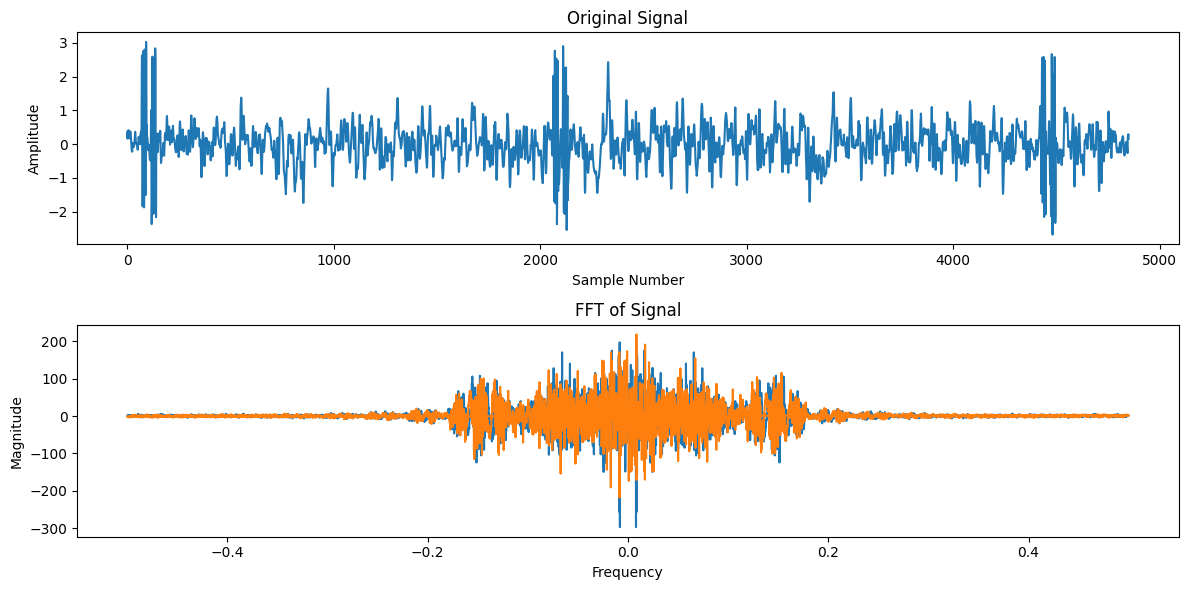

In [ ]:
##########FFT##########
import numpy as np
import pandas as pd
import scipy.signal as signal
import matplotlib.pyplot as plt

# def fft_filter(data, cutoff):
#     fft_data = np.fft.fft(data)
#     frequencies = np.fft.fftfreq(len(data))
#     fft_data[np.abs(frequencies) > cutoff] = 0
#     filtered_data = np.fft.ifft(fft_data)
#     return np.real(filtered_data)

file_path = 'Accelerometer.csv'
data = pd.read_csv(file_path)

signal = data.iloc[:,4].values

fft_result = np.fft.fft(signal)

frequencies = np.fft.fftfreq(signal.shape[-1])

# Plot the original signal
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(signal)
plt.title('Original Signal')
plt.xlabel('Sample Number')
plt.ylabel('Amplitude')

# Plot the FFT result (magnitude)
plt.subplot(2, 1, 2)
plt.plot(frequencies, fft_result.real, frequencies, fft_result.imag)
plt.title('FFT of Signal')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')

plt.tight_layout()
plt.show()


(3656,)
(3656, 3)


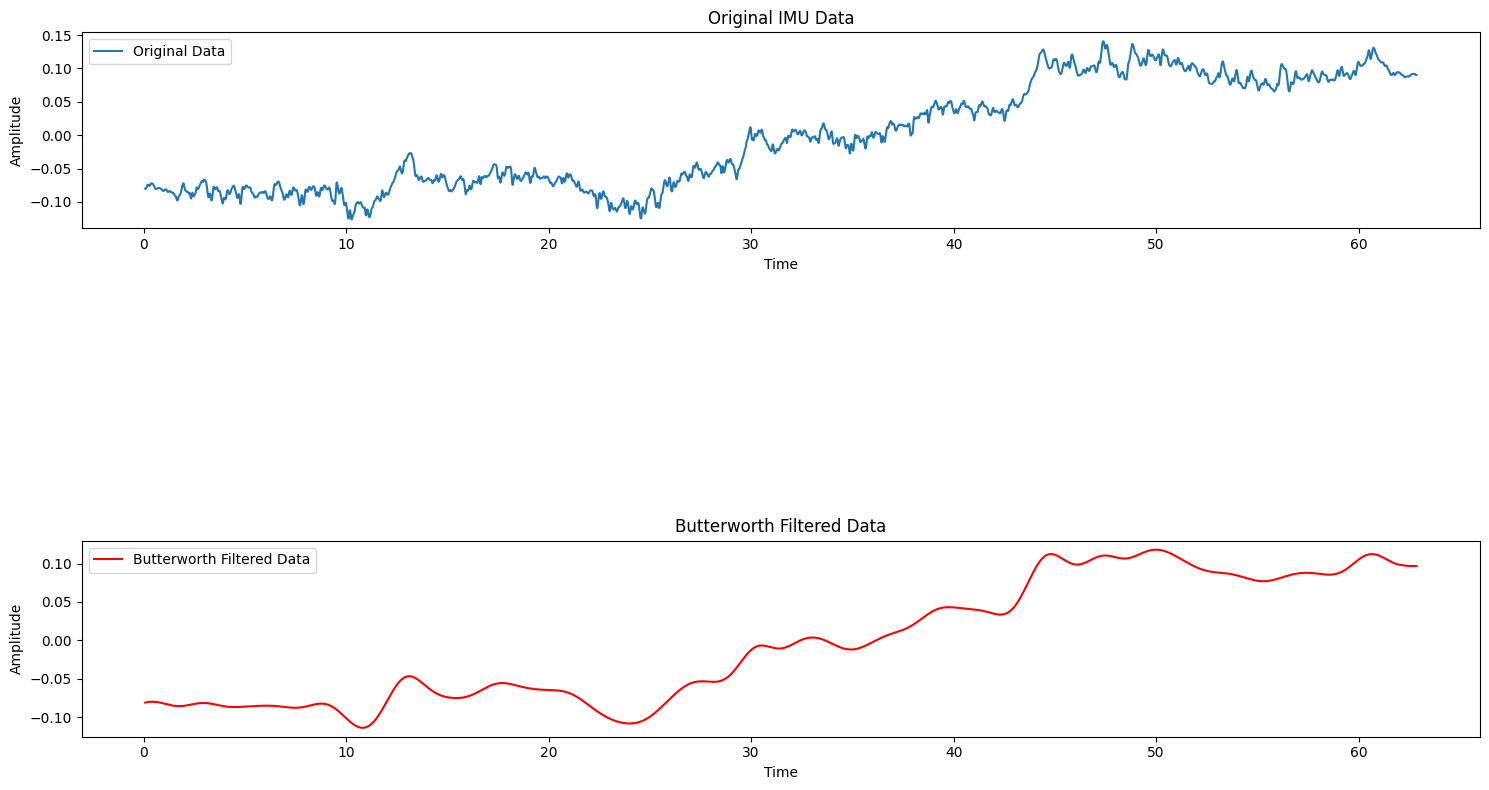

(3656,)
(3656, 4)


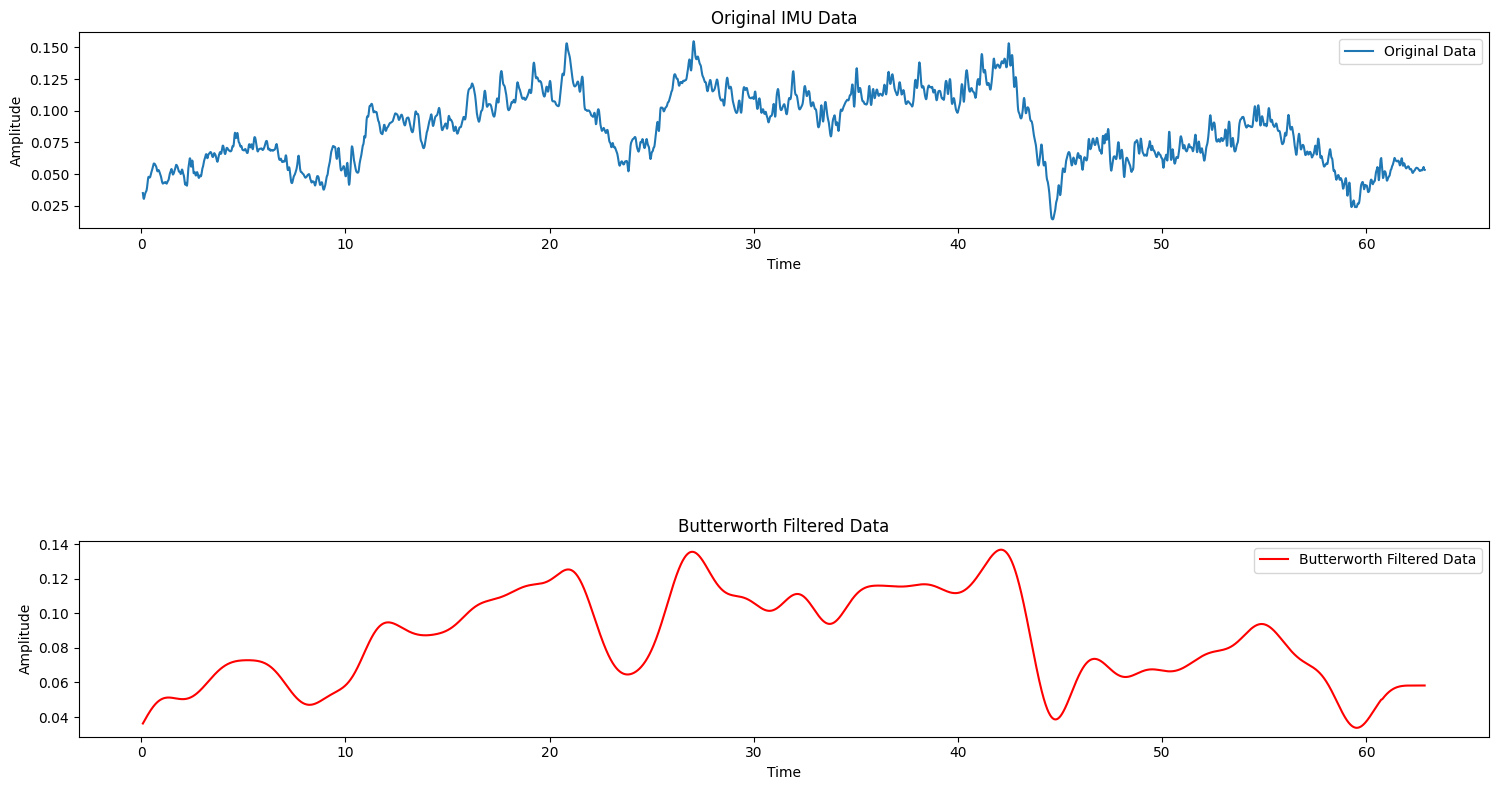

(3656,)
(3656, 5)


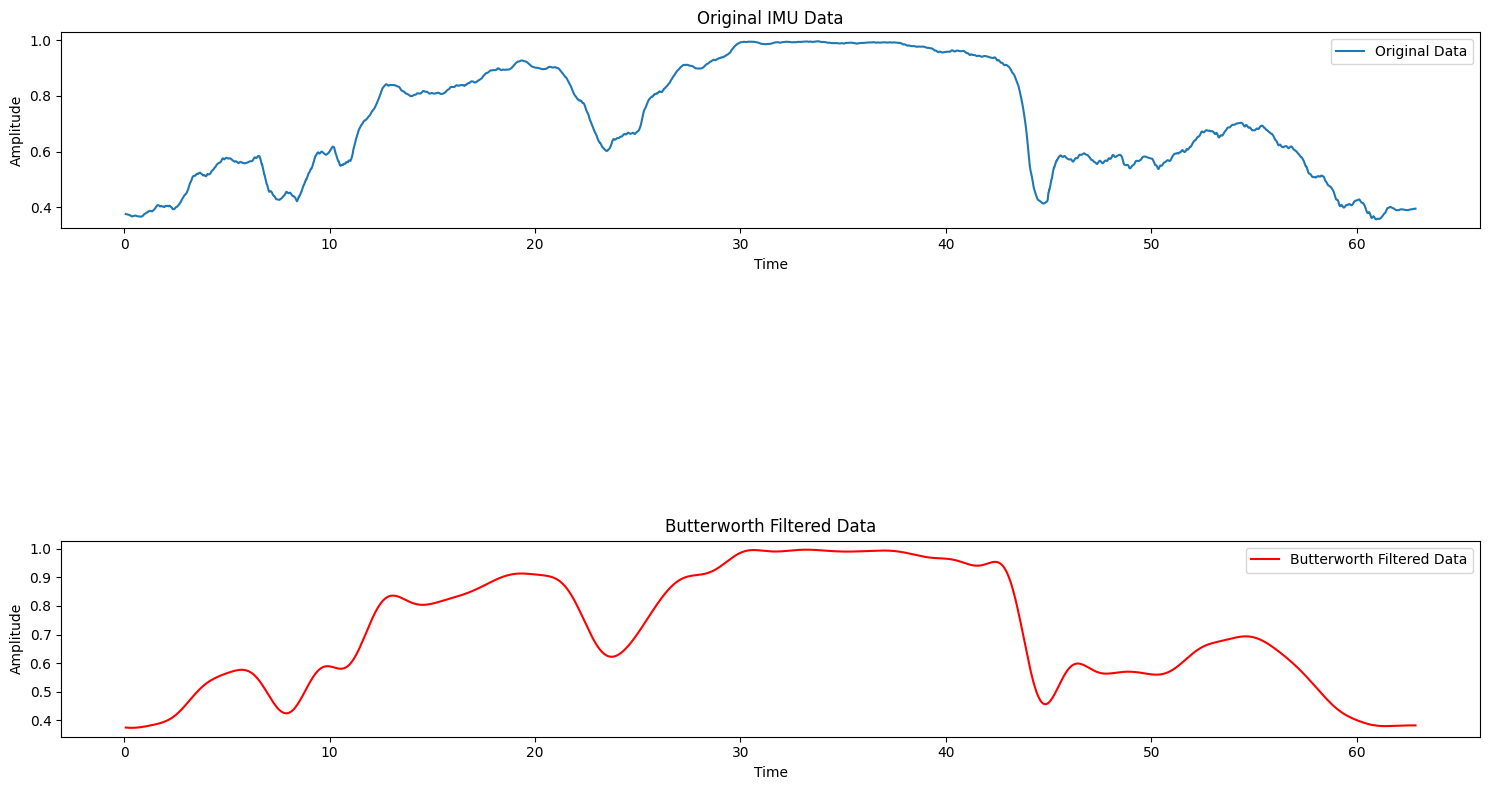

(3656,)
(3656, 6)


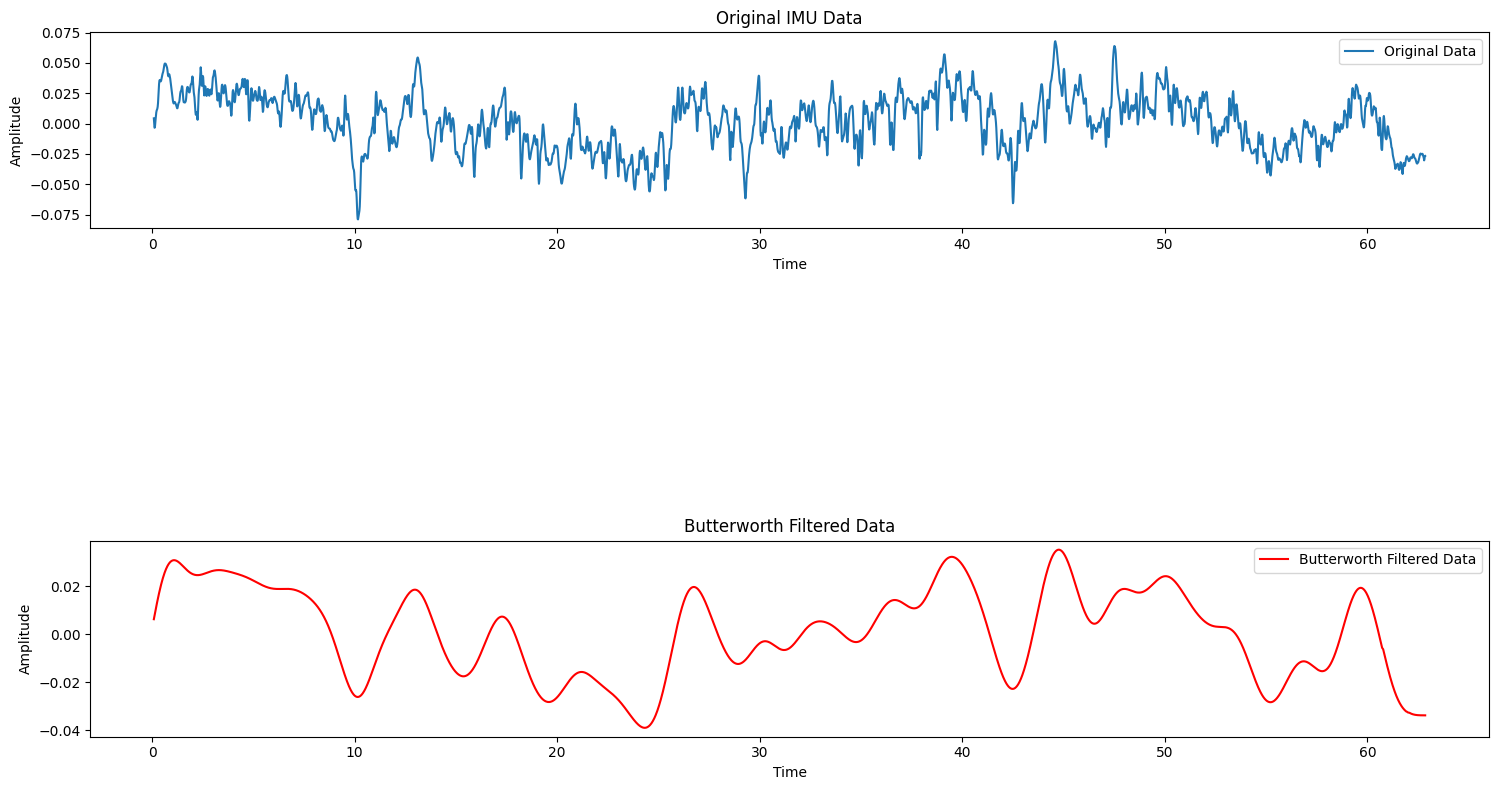

(3656,)
(3656, 7)


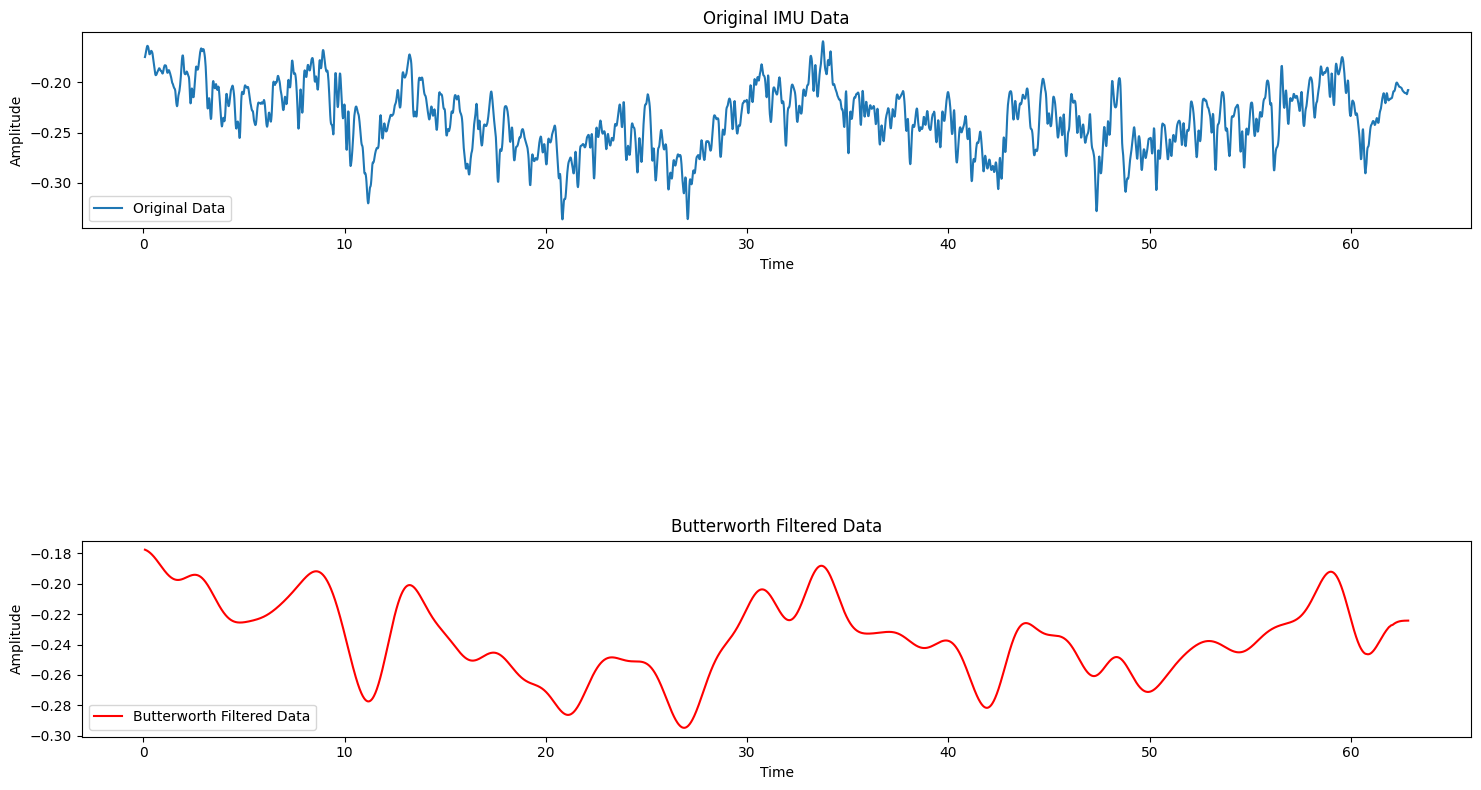

(3656,)
(3656, 8)


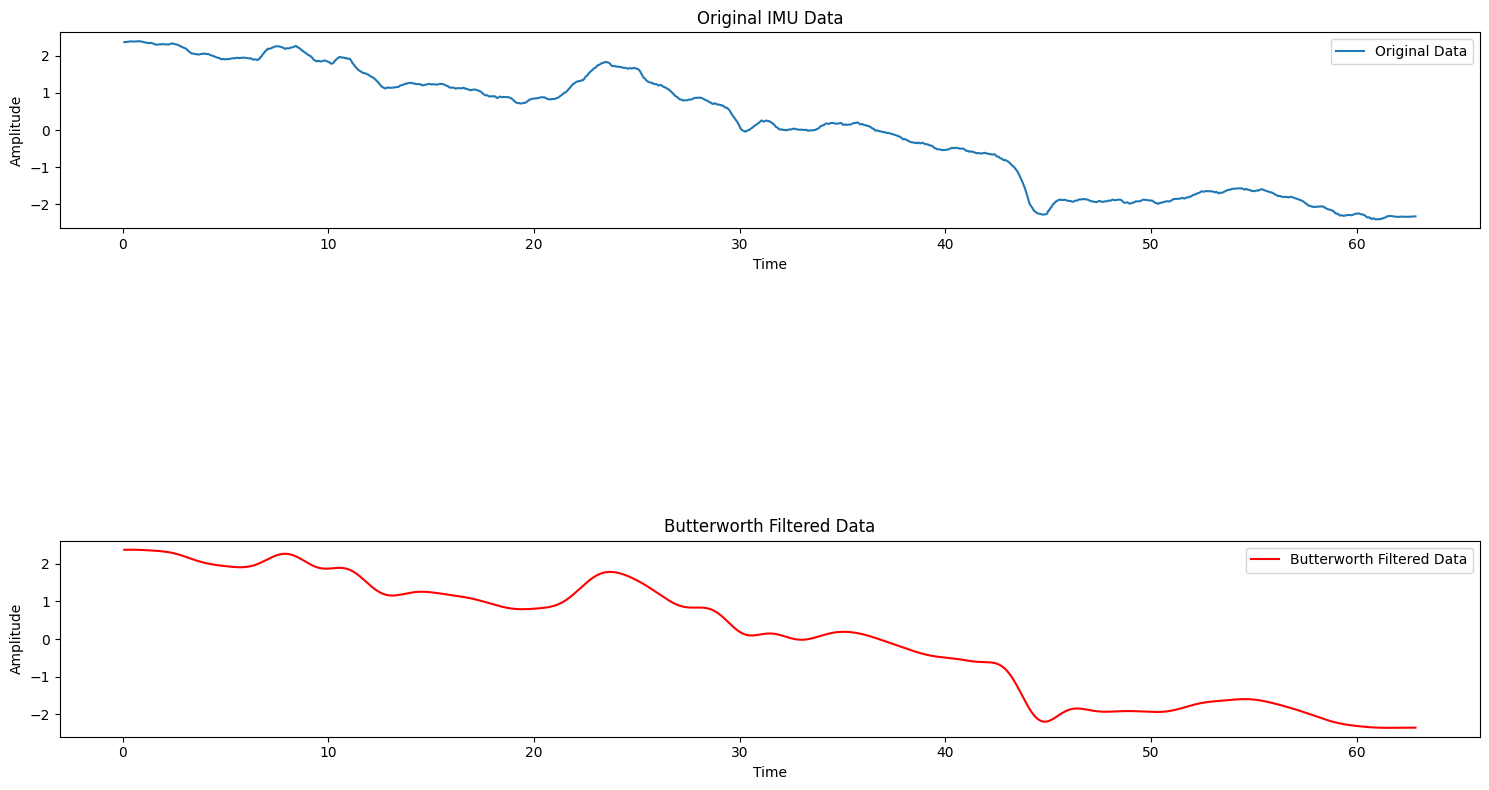

[[ 8.37949219e-02 -9.22594043e-01 -8.10324169e-02 ...  6.24947815e-03
  -1.77648994e-01  2.36956858e+00]
 [ 1.00950439e-01 -9.22620045e-01 -8.09330069e-02 ...  7.02567020e-03
  -1.77736474e-01  2.36984853e+00]
 [ 1.18096924e-01 -9.22643345e-01 -8.08376542e-02 ...  7.79674576e-03
  -1.77831395e-01  2.37011550e+00]
 ...
 [ 6.28200608e+01  9.16773920e-01  9.67821490e-02 ... -3.38395826e-02
  -2.24285641e-01 -2.35424296e+00]
 [ 6.28372063e+01  9.16773764e-01  9.67811275e-02 ... -3.38400482e-02
  -2.24283676e-01 -2.35424159e+00]
 [ 6.28543455e+01  9.16773640e-01  9.67803221e-02 ... -3.38404108e-02
  -2.24282126e-01 -2.35424050e+00]]


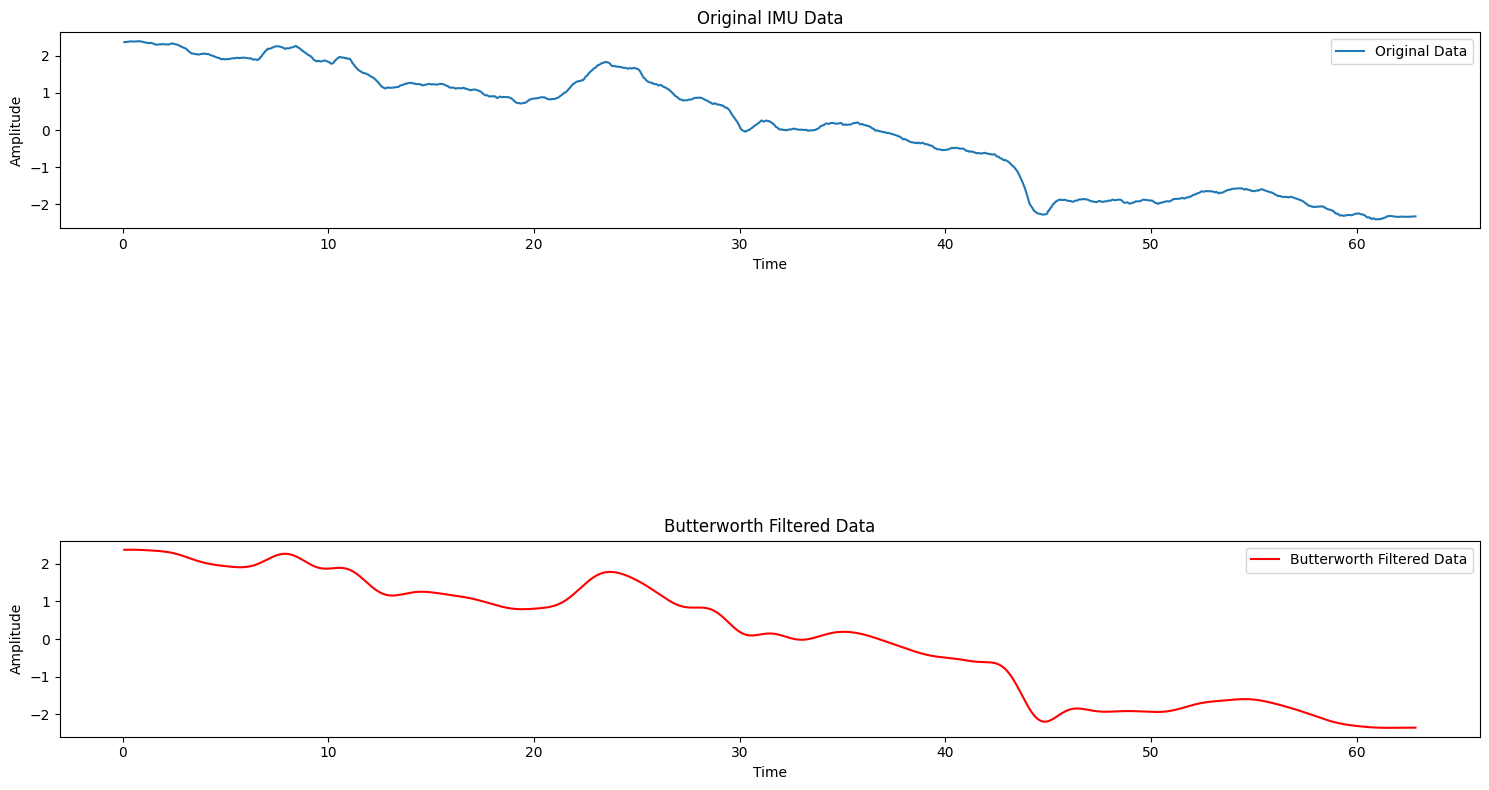

In [ ]:
######FILTERING BUTTERWORTH ORIENTATION########
import numpy as np
import pandas as pd
import scipy.signal as signal
import matplotlib.pyplot as plt
import csv

def butter_filter(data, cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = signal.butter(order, normal_cutoff, btype='low', analog=False)
    filtered_data = signal.filtfilt(b, a, data)
    return filtered_data

filename = 'Orientation.csv'
df = pd.read_csv(filename)
time = df.iloc[:, 1]
imu_data = df.iloc[:, 2]

# Filter parameters
cutoff_freq = 0.4  # cutoff frequency
sampling_rate = 1 / (time.iloc[1] - time.iloc[0])

data = time
butter_filtered_data = butter_filter(imu_data, cutoff_freq, sampling_rate)
data = np.column_stack((data,butter_filtered_data))

# print(data)


##Filtering all axis
for i in [3,4,5,6,7,8]:
  imu_data = df.iloc[:, i]
  butter_filtered_data = butter_filter(imu_data, cutoff_freq, sampling_rate)
  print(butter_filtered_data.shape)
  data = np.column_stack((data,butter_filtered_data))
  print(data.shape)

  plt.figure(figsize=(15, 8))

  plt.subplot(3, 1, 1)
  plt.plot(time, imu_data, label='Original Data')
  plt.title('Original IMU Data')
  plt.xlabel('Time')
  plt.ylabel('Amplitude')
  plt.legend()

  plt.subplot(3, 1, 3)
  plt.plot(time, butter_filtered_data, label='Butterworth Filtered Data', color='r')
  plt.title('Butterworth Filtered Data')
  plt.xlabel('Time')
  plt.ylabel('Amplitude')
  plt.legend()

  plt.tight_layout()
  plt.show()

##Getting filtered time
#data = np.column_stack((time, data))

print(data)

##Saving filtered data to csv
file_path = 'FilteredOrientationData.csv'

# Writing to csv file
with open(file_path, mode='w', newline='') as file:
    writer = csv.writer(file)

    # Writing header
    writer.writerow(["seconds_elpased","qz","qy","qx","qw","roll", "pitch", "yaw"])

    # Writing data
    writer.writerows(data)


# Apply Butterworth filter
#butter_filtered_data = butter_filter(imu_data, cutoff_freq, sampling_rate)

# Plotting the results
plt.figure(figsize=(15, 8))

plt.subplot(3, 1, 1)
plt.plot(time, imu_data, label='Original Data')
plt.title('Original IMU Data')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(time, butter_filtered_data, label='Butterworth Filtered Data', color='r')
plt.title('Butterworth Filtered Data')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()

(4851,)
(4851, 3)


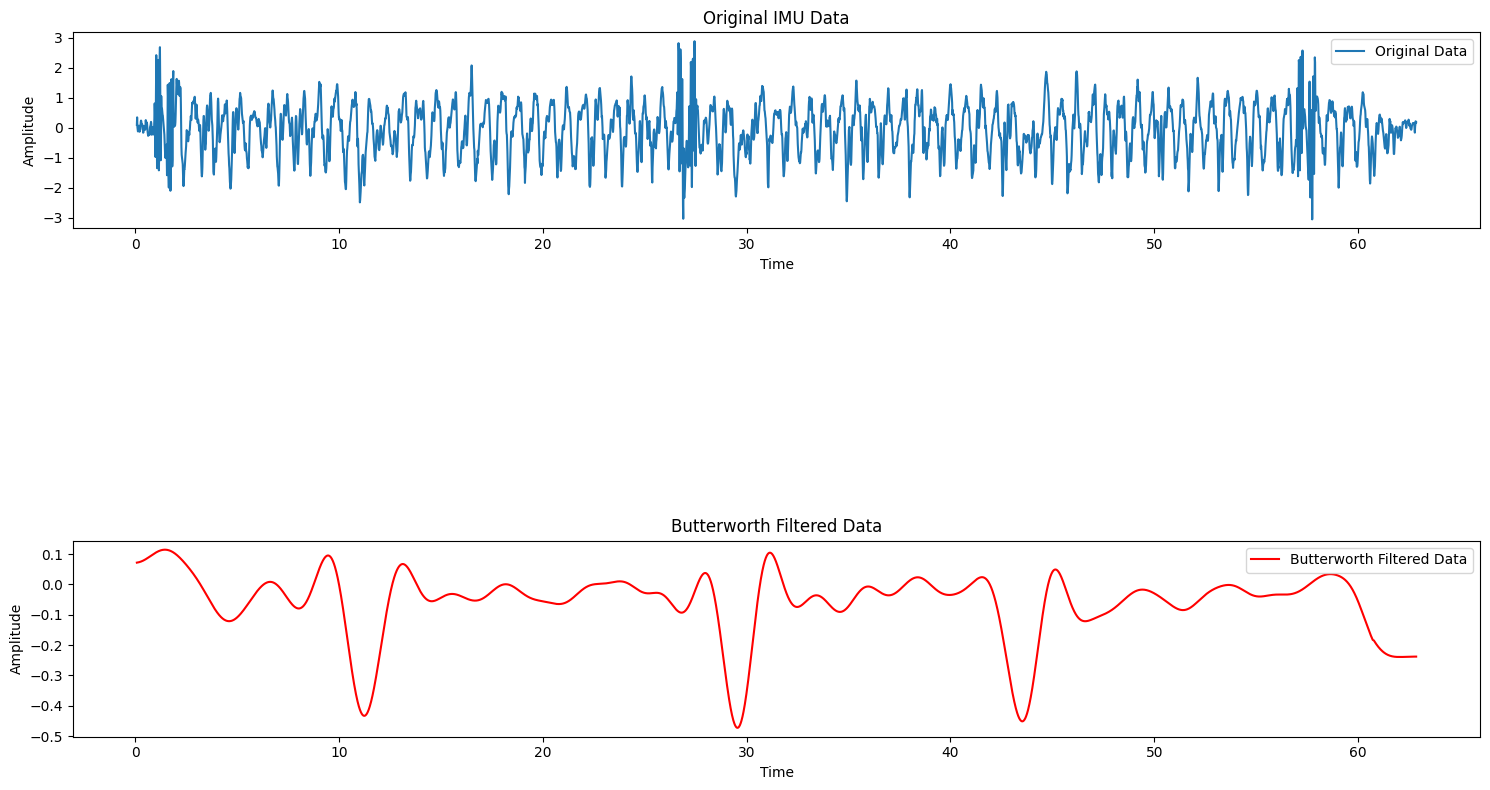

(4851,)
(4851, 4)


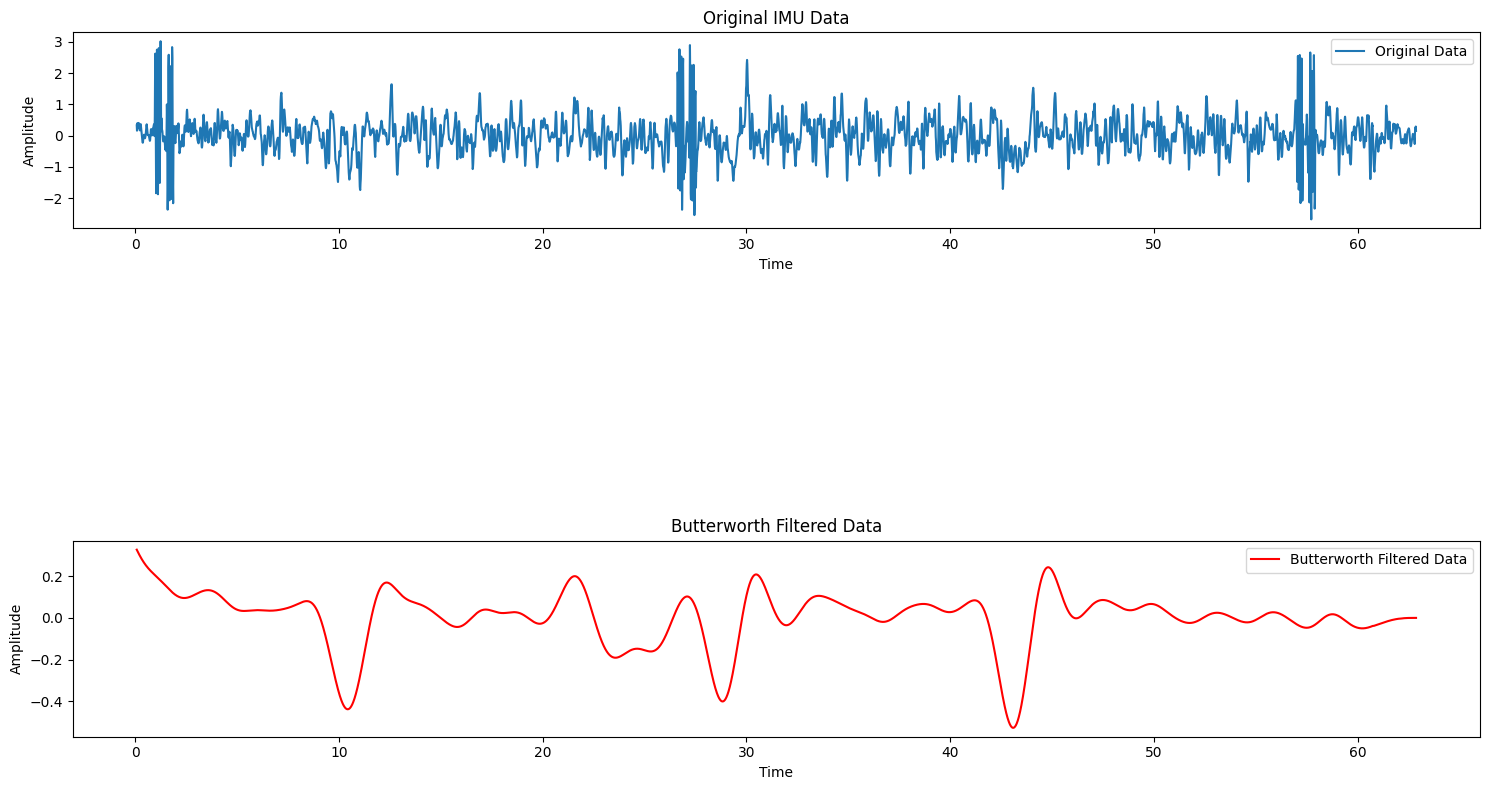

[[ 7.95100098e-02 -1.13854111e+00  7.17594222e-02  3.28293333e-01]
 [ 9.23801270e-02 -1.11689732e+00  7.18908082e-02  3.25687083e-01]
 [ 1.05226562e-01 -1.09525329e+00  7.20349360e-02  3.23103129e-01]
 ...
 [ 6.28286362e+01  2.63409404e-02 -2.38066394e-01  3.71532207e-04]
 [ 6.28414937e+01  2.63407314e-02 -2.38065414e-01  3.72193749e-04]
 [ 6.28543455e+01  2.63405650e-02 -2.38064635e-01  3.72711231e-04]]


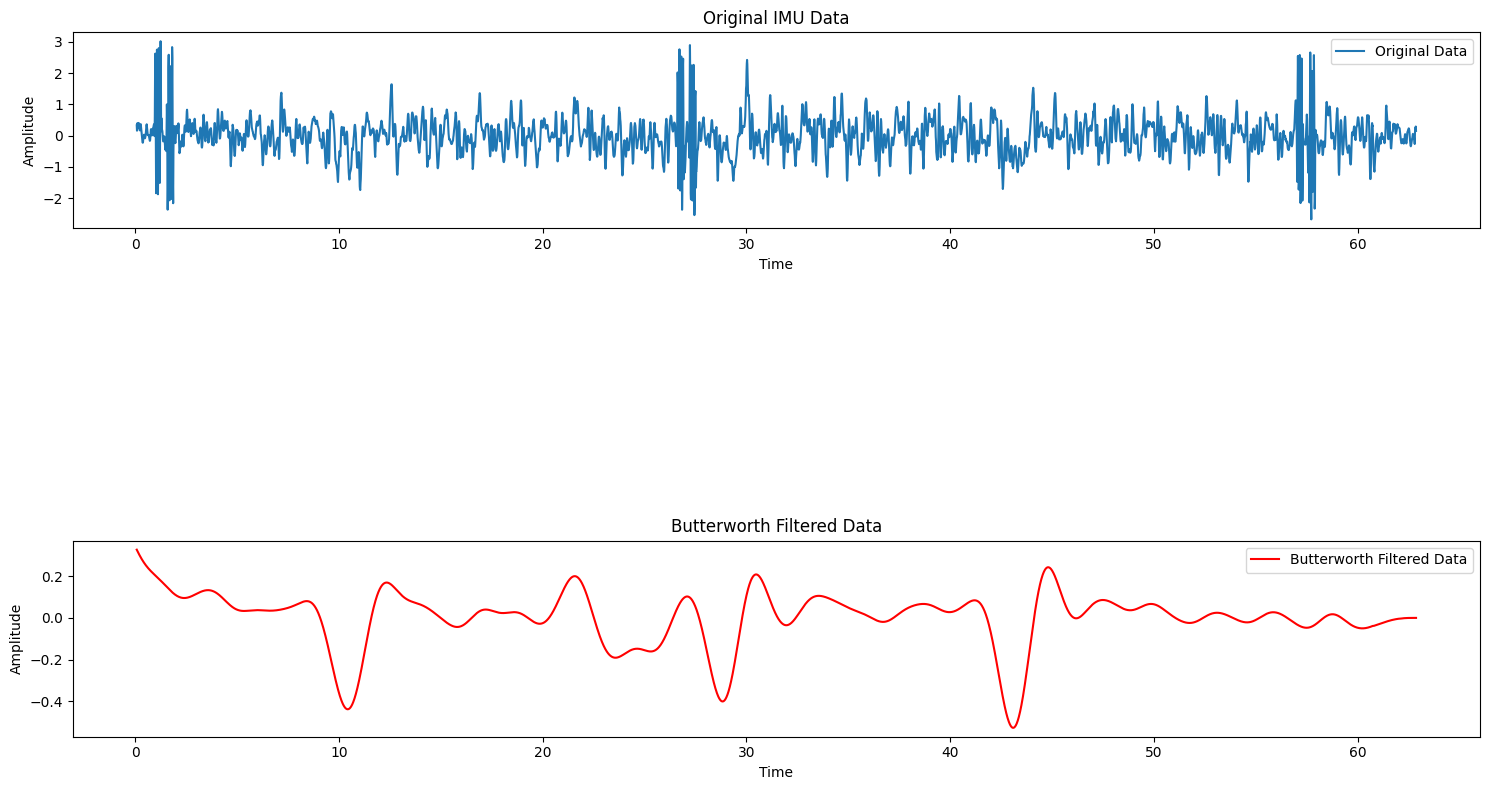

In [ ]:
######FILTERING BUTTERWORTH Accelerometer########
import numpy as np
import pandas as pd
import scipy.signal as signal
import matplotlib.pyplot as plt
import csv

def butter_filter(data, cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = signal.butter(order, normal_cutoff, btype='low', analog=False)
    filtered_data = signal.filtfilt(b, a, data)
    return filtered_data

filename = 'Accelerometer.csv'
df = pd.read_csv(filename)
time = df.iloc[:, 1]
imu_data = df.iloc[:, 2]

# Filter parameters
cutoff_freq = 0.4  # cutoff frequency
sampling_rate = 1 / (time.iloc[1] - time.iloc[0])

data = time
butter_filtered_data = butter_filter(imu_data, cutoff_freq, sampling_rate)
data = np.column_stack((data,butter_filtered_data))

# print(data)


##Filtering all axis
for i in [3,4]:
  imu_data = df.iloc[:, i]
  butter_filtered_data = butter_filter(imu_data, cutoff_freq, sampling_rate)
  print(butter_filtered_data.shape)
  data = np.column_stack((data,butter_filtered_data))
  print(data.shape)

  plt.figure(figsize=(15, 8))

  plt.subplot(3, 1, 1)
  plt.plot(time, imu_data, label='Original Data')
  plt.title('Original IMU Data')
  plt.xlabel('Time')
  plt.ylabel('Amplitude')
  plt.legend()

  plt.subplot(3, 1, 3)
  plt.plot(time, butter_filtered_data, label='Butterworth Filtered Data', color='r')
  plt.title('Butterworth Filtered Data')
  plt.xlabel('Time')
  plt.ylabel('Amplitude')
  plt.legend()

  plt.tight_layout()
  plt.show()

##Getting filtered time
#data = np.column_stack((time, data))

print(data)

##Saving filtered data to csv
file_path = 'FilteredAccelerometerData.csv'

# Writing to csv file
with open(file_path, mode='w', newline='') as file:
    writer = csv.writer(file)

    # Writing header
    writer.writerow(["seconds_elpased","z","y","x"])

    # Writing data
    writer.writerows(data)


# Apply Butterworth filter
#butter_filtered_data = butter_filter(imu_data, cutoff_freq, sampling_rate)

# Plotting the results
plt.figure(figsize=(15, 8))

plt.subplot(3, 1, 1)
plt.plot(time, imu_data, label='Original Data')
plt.title('Original IMU Data')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(time, butter_filtered_data, label='Butterworth Filtered Data', color='r')
plt.title('Butterworth Filtered Data')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()

(4855,)
(4855, 3)


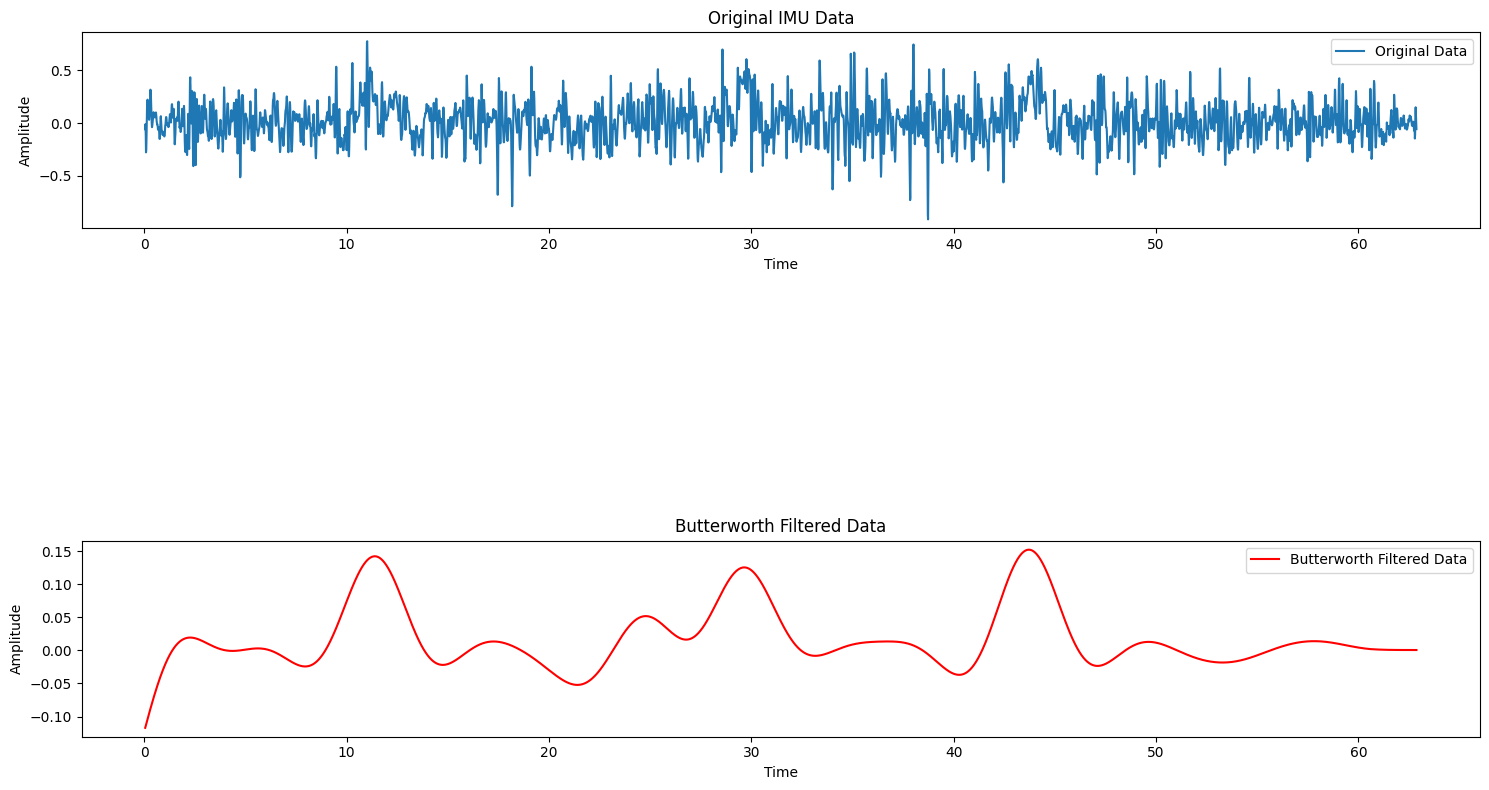

(4855,)
(4855, 4)


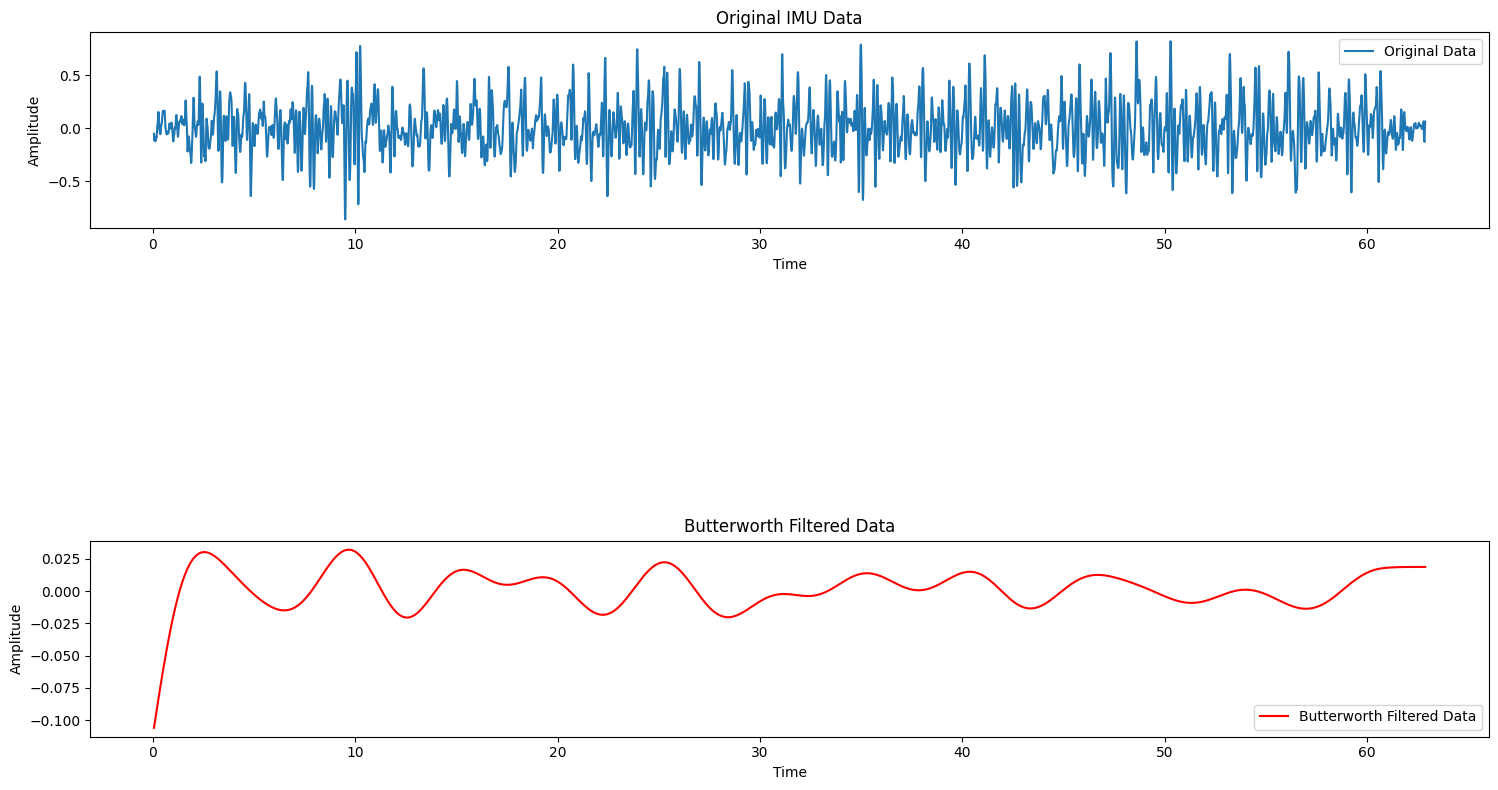

[[ 5.37890625e-02  9.78087421e-02 -1.17093885e-01 -1.05920129e-01]
 [ 6.66594238e-02  9.68104432e-02 -1.15618011e-01 -1.04591117e-01]
 [ 7.95100098e-02  9.58114839e-02 -1.14144853e-01 -1.03263908e-01]
 ...
 [ 6.28372063e+01  1.79006410e-02  4.78661052e-04  1.86519592e-02]
 [ 6.28500657e+01  1.79006432e-02  4.78656705e-04  1.86519608e-02]
 [ 6.28629236e+01  1.79006449e-02  4.78653326e-04  1.86519620e-02]]


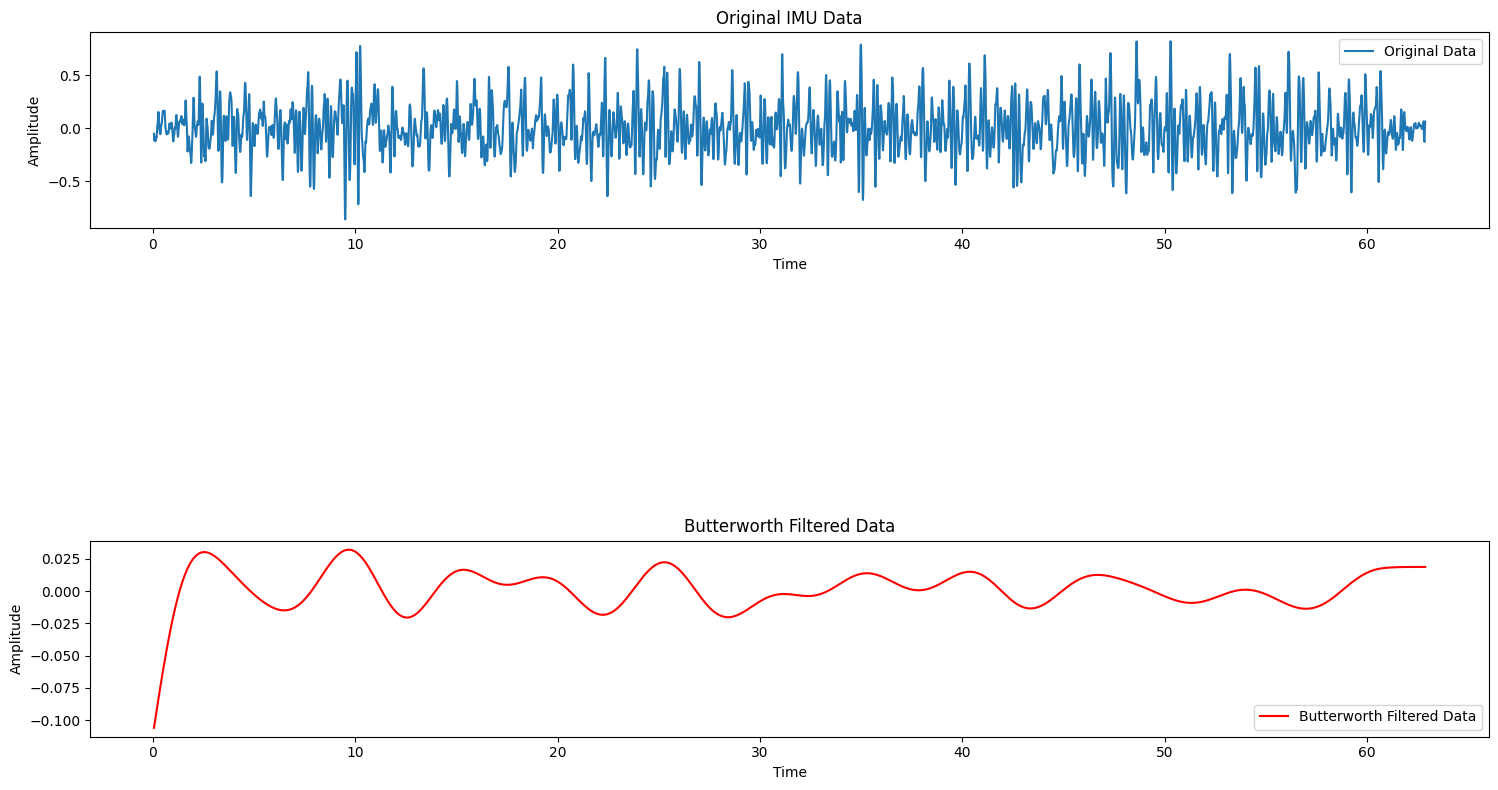

In [ ]:
######FILTERING BUTTERWORTH Gyroscope########
import numpy as np
import pandas as pd
import scipy.signal as signal
import matplotlib.pyplot as plt
import csv

def butter_filter(data, cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = signal.butter(order, normal_cutoff, btype='low', analog=False)
    filtered_data = signal.filtfilt(b, a, data)
    return filtered_data

filename = 'Gyroscope.csv'
df = pd.read_csv(filename)
time = df.iloc[:, 1]
imu_data = df.iloc[:, 2]

# Filter parameters
cutoff_freq = 0.2  # cutoff frequency
sampling_rate = 1 / (time.iloc[1] - time.iloc[0])

data = time
butter_filtered_data = butter_filter(imu_data, cutoff_freq, sampling_rate)
data = np.column_stack((data,butter_filtered_data))

# print(data)


##Filtering all axis
for i in [3,4]:
  imu_data = df.iloc[:, i]
  butter_filtered_data = butter_filter(imu_data, cutoff_freq, sampling_rate)
  print(butter_filtered_data.shape)
  data = np.column_stack((data,butter_filtered_data))
  print(data.shape)

  plt.figure(figsize=(15, 8))

  plt.subplot(3, 1, 1)
  plt.plot(time, imu_data, label='Original Data')
  plt.title('Original IMU Data')
  plt.xlabel('Time')
  plt.ylabel('Amplitude')
  plt.legend()

  plt.subplot(3, 1, 3)
  plt.plot(time, butter_filtered_data, label='Butterworth Filtered Data', color='r')
  plt.title('Butterworth Filtered Data')
  plt.xlabel('Time')
  plt.ylabel('Amplitude')
  plt.legend()

  plt.tight_layout()
  plt.show()

##Getting filtered time
#data = np.column_stack((time, data))

print(data)

##Saving filtered data to csv
file_path = 'FilteredGyroscopeData.csv'

# Writing to csv file
with open(file_path, mode='w', newline='') as file:
    writer = csv.writer(file)

    # Writing header
    writer.writerow(["seconds_elpased","z","y","x"])

    # Writing data
    writer.writerows(data)


# Apply Butterworth filter
#butter_filtered_data = butter_filter(imu_data, cutoff_freq, sampling_rate)

# Plotting the results
plt.figure(figsize=(15, 8))

plt.subplot(3, 1, 1)
plt.plot(time, imu_data, label='Original Data')
plt.title('Original IMU Data')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(time, butter_filtered_data, label='Butterworth Filtered Data', color='r')
plt.title('Butterworth Filtered Data')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()

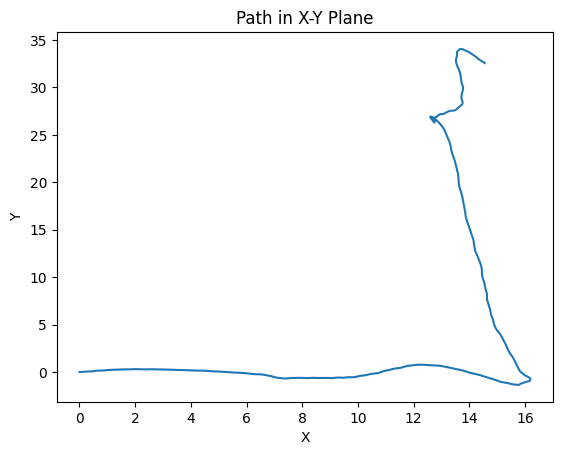

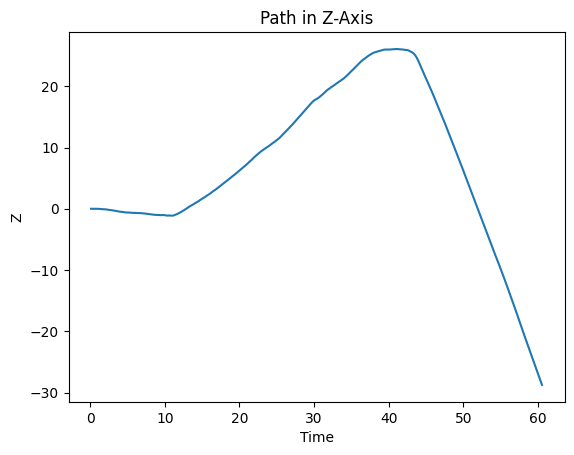

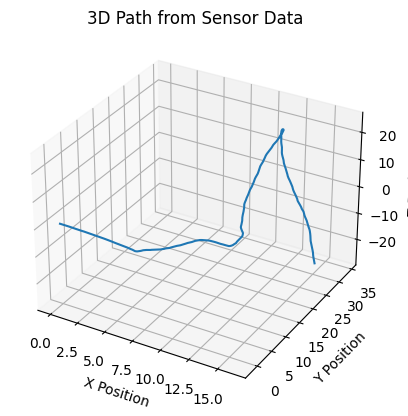

In [ ]:
##########PLOTTING MAIN############

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import cumtrapz
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.transform import Rotation as R

# Load data
accel_data = pd.read_csv('Accelerometer.csv')
gyro_data = pd.read_csv('Gyroscope.csv')
orient_data = pd.read_csv('Orientation.csv')

# Ensure the data is sorted by timestamp and has consistent timestamps
# Assuming each CSV has a 'timestamp' column
accel_data = accel_data.sort_values('seconds_elapsed')
gyro_data = gyro_data.sort_values('seconds_elapsed')
orient_data = orient_data.sort_values('seconds_elapsed')

# Resample or interpolate to ensure consistent timestamps across all data
timestamps = np.intersect1d(accel_data['seconds_elapsed'], np.intersect1d(gyro_data['seconds_elapsed'], orient_data['seconds_elapsed']))
accel_data = accel_data[accel_data['seconds_elapsed'].isin(timestamps)]
gyro_data = gyro_data[gyro_data['seconds_elapsed'].isin(timestamps)]
orient_data = orient_data[orient_data['seconds_elapsed'].isin(timestamps)]

# Convert timestamps to a numpy array for integration
time = accel_data['seconds_elapsed'].values

# Convert acceleration to velocity (integrate)
accel_x = accel_data['x'].values
accel_y = accel_data['y'].values
accel_z = accel_data['z'].values

velocity_x = cumtrapz(accel_x, time, initial=0)
velocity_y = cumtrapz(accel_y, time, initial=0)
velocity_z = cumtrapz(accel_z, time, initial=0)


# #Using Euler Angles
# roll = orient_data['roll'].values
# pitch = orient_data['pitch'].values
# yaw = orient_data['yaw'].values

# # Apply orientation to adjust the path
# velocities = np.vstack((velocity_x, velocity_y, velocity_z)).T
# adjusted_velocities = np.zeros_like(velocities)

# for i in range(len(velocities)):
#     # Calculate the rotation matrix from roll, pitch, and yaw
#     cy = np.cos(yaw[i])
#     sy = np.sin(yaw[i])
#     cp = np.cos(pitch[i])
#     sp = np.sin(pitch[i])
#     cr = np.cos(roll[i])
#     sr = np.sin(roll[i])

#     rot_matrix = np.array([
#         [cy * cp, cy * sp * sr - sy * cr, cy * sp * cr + sy * sr],
#         [sy * cp, sy * sp * sr + cy * cr, sy * sp * cr - cy * sr],
#         [-sp, cp * sr, cp * cr]
#     ])

#     print(rot_matrix)

#     adjusted_velocities[i] = np.dot(rot_matrix, velocities[i])

#Get quaternion orientation data
quaternions = orient_data[['qw', 'qx', 'qy', 'qz']].values

# Apply orientation to adjust the path
velocities = np.vstack((velocity_x, velocity_y, velocity_z)).T
adjusted_velocities = np.zeros_like(velocities)

for i in range(len(velocities)):
    # Convert quaternion to rotation matrix
    rot = R.from_quat(quaternions[i])
    adjusted_velocities[i] = rot.apply(velocities[i])

# Convert velocity to position (integrate)
position_x = cumtrapz(adjusted_velocities[:, 0], time, initial=0)
position_y = cumtrapz(adjusted_velocities[:, 1], time, initial=0)
position_z = cumtrapz(adjusted_velocities[:, 2], time, initial=0)

# Plot the path in the x,y plane
plt.figure()
plt.plot(position_x, position_y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Path in X-Y Plane')
plt.show()

# Plot the path in the z-axis
plt.figure()
plt.plot(time, position_z)
plt.xlabel('Time')
plt.ylabel('Z')
plt.title('Path in Z-Axis')
plt.show()


# Plot the path
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(position_x, position_y, position_z)
ax.set_xlabel('X Position')
ax.set_ylabel('Y Position')
ax.set_zlabel('Z Position')
plt.title('3D Path from Sensor Data')
plt.show()


[[-9.22643345e-01 -8.08376542e-02  3.69788415e-02 ...  7.79674576e-03
  -1.77831395e-01  2.37011550e+00]
 [-9.22696563e-01 -8.05771169e-02  3.80711684e-02 ...  1.00733688e-02
  -1.78161122e-01  2.37083495e+00]
 [-9.22723934e-01 -8.03570865e-02  3.91509429e-02 ...  1.22830459e-02
  -1.78558532e-01  2.37142544e+00]
 ...
 [ 9.12655983e-01  1.11659241e-01  4.53553791e-02 ...  4.05922676e-03
  -2.41317429e-01 -2.33434395e+00]
 [ 9.13018547e-01  1.11963578e-01  4.62857335e-02 ...  2.29209627e-03
  -2.42646328e-01 -2.33680632e+00]
 [ 9.13371525e-01  1.12169428e-01  4.71999872e-02 ...  4.87089557e-04
  -2.43779215e-01 -2.33916585e+00]]


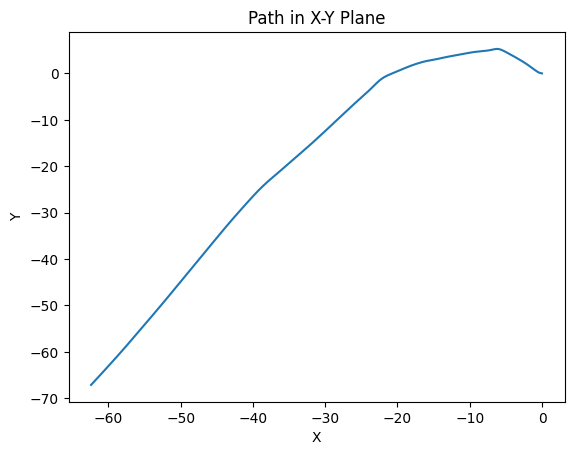

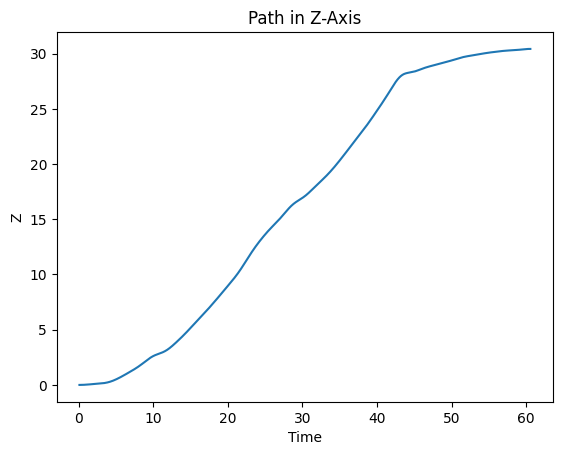

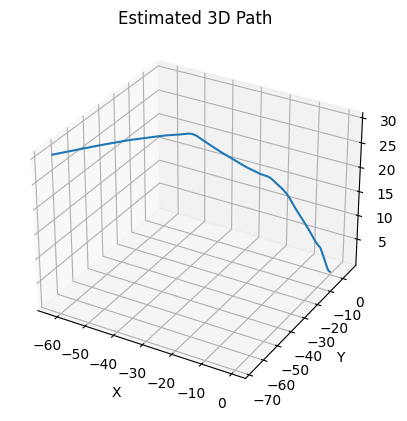

In [ ]:
# prompt: I have data acceleration, gyroscope and orientation data in x,y,z in 3 different csv files. I need you to use all that data to plot the original path in the x,y plane as well as the path taken in the z-axis. Make sure to account for gyro and orientation

########PLOTTING 2ND TRY###############

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the three files
acceleration_data = pd.read_csv('FilteredAccelerometerData.csv')
gyroscope_data = pd.read_csv('FilteredGyroscopeData.csv')
orientation_data = pd.read_csv('FilteredOrientationData.csv')

# Assuming each CSV has a 'timestamp' column
acceleration_data = acceleration_data.sort_values('seconds_elpased')
gyroscope_data = gyroscope_data.sort_values('seconds_elpased')
orientation_data = orientation_data.sort_values('seconds_elpased')

# Resample or interpolate to ensure consistent timestamps across all data
timestamps = np.intersect1d(acceleration_data['seconds_elpased'], np.intersect1d(gyroscope_data['seconds_elpased'], orientation_data['seconds_elpased']))
acceleration_data = acceleration_data[acceleration_data['seconds_elpased'].isin(timestamps)]
gyroscope_data = gyroscope_data[gyroscope_data['seconds_elpased'].isin(timestamps)]
orientation_data = orientation_data[orientation_data['seconds_elpased'].isin(timestamps)]

# Assuming the first column in each file is time and the rest are x, y, z values
time = acceleration_data['seconds_elpased'].values
acceleration = acceleration_data.iloc[:, 1:].values
gyroscope = gyroscope_data.iloc[:, 1:].values
orientation = orientation_data.iloc[:, 1:].values
print(orientation)

# Adjust acceleration using orientation
# Here we're assuming orientation is in Euler angles (roll, pitch, yaw)
# You might need to adjust this if your orientation data is in a different format
for i in range(len(acceleration)):
  roll = orientation[i, 0]
  pitch = orientation[i, 1]
  yaw = orientation[i, 2]

  # Rotation matrices for each axis
  Rx = np.array([[1, 0, 0],
                 [0, np.cos(roll), -np.sin(roll)],
                 [0, np.sin(roll), np.cos(roll)]])
  Ry = np.array([[np.cos(pitch), 0, np.sin(pitch)],
                 [0, 1, 0],
                 [-np.sin(pitch), 0, np.cos(pitch)]])
  Rz = np.array([[np.cos(yaw), -np.sin(yaw), 0],
                 [np.sin(yaw), np.cos(yaw), 0],
                 [0, 0, 1]])

  # Combined rotation matrix
  R = Rz @ Ry @ Rx
  # print(R.shape)
  # Rotate acceleration vector
  # print(acceleration.shape)
  acceleration[i] = R @ acceleration[i]

# Integrate acceleration to get velocity and position
velocity = np.cumsum(acceleration, axis=0) * (time[1]-time[0])
position = np.cumsum(velocity, axis=0) * (time[1]-time[0])

# Plot the path in the x,y plane
plt.figure()
plt.plot(position[:, 0], position[:, 1])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Path in X-Y Plane')
plt.show()

# Plot the path in the z-axis
plt.figure()
plt.plot(time, position[:, 2])
plt.xlabel('Time')
plt.ylabel('Z')
plt.title('Path in Z-Axis')
plt.show()

# Plot the 3D path
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(position[:, 0], position[:, 1], position[:, 2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Estimated 3D Path')
plt.show()


Total steps: 46
Total time (minutes): 1.05
Steps per minute: 43.97


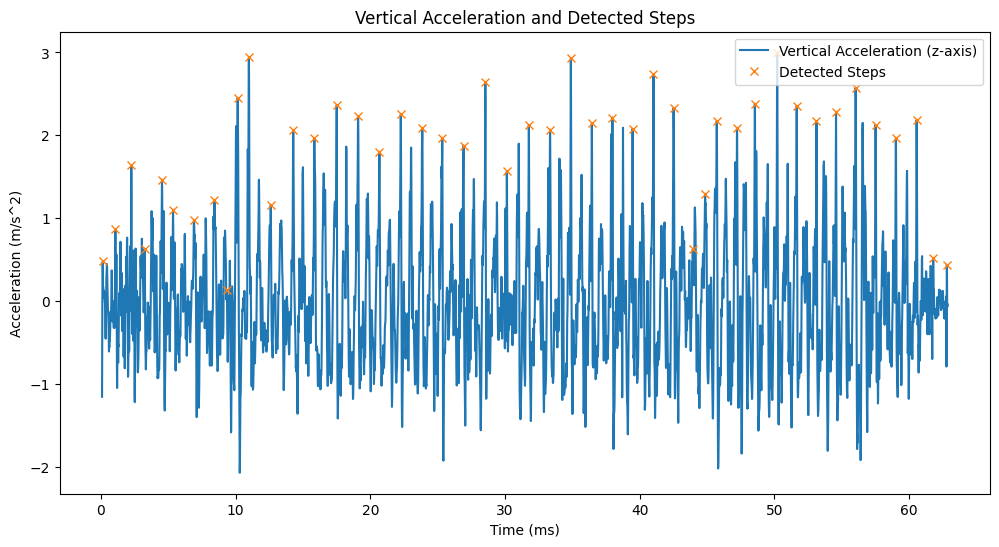

In [3]:
#####STEPS PER MINUTE FINDER#####
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Load data
accel_data = pd.read_csv('Accelerometer.csv')

# Ensure the data is sorted by timestamp and has consistent timestamps
accel_data = accel_data.sort_values('seconds_elapsed')

# Convert timestamps to a numpy array for integration
time = accel_data['seconds_elapsed'].values

# Extract vertical acceleration (assuming z-axis is vertical)
accel_z = accel_data['z'].values

# Detect peaks in the vertical acceleration data (steps)
peaks, _ = find_peaks(accel_z, height=-0.02, distance=63)  # Adjust height and distance as needed

# Calculate steps per minute
step_count = len(peaks)
total_time_seconds = (time[-1] - time[0])
total_time_minutes = total_time_seconds / 60
steps_per_minute = step_count / total_time_minutes

print(f"Total steps: {step_count}")
print(f"Total time (minutes): {total_time_minutes:.2f}")
print(f"Steps per minute: {steps_per_minute:.2f}")

# Plot the vertical acceleration data with detected steps
plt.figure(figsize=(12, 6))
plt.plot(time, accel_z, label='Vertical Acceleration (z-axis)')
plt.plot(time[peaks], accel_z[peaks], 'x', label='Detected Steps')
plt.xlabel('Time (ms)')
plt.ylabel('Acceleration (m/s^2)')
plt.title('Vertical Acceleration and Detected Steps')
plt.legend()
plt.show()
